### iris Dataset 활용 분류

In [1]:
# 모듈 로딩
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [15]:
iris = load_iris(as_frame=True, return_X_y=True)
type(iris), type(iris[0]), type(iris[1])

(tuple, pandas.core.frame.DataFrame, pandas.core.series.Series)

In [43]:
data, target = iris[0], iris[1]
print(target.head(3), target.unique(), target.value_counts(), sep='\n')

0    0
1    0
2    0
Name: target, dtype: int32
[0 1 2]
0    50
1    50
2    50
Name: target, dtype: int64


### 2. 학습 데이터 준비
- 데이터 : petal_length, petal_width
- 타겟 : 0, 2

In [44]:
data = data.iloc[:,[2,3]]
data.drop(range(50,100), inplace=True)
target.drop(range(50,100), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16720\3393877109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(range(50,100), inplace=True)


[]

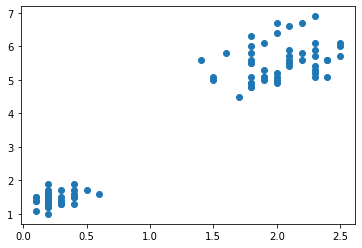

In [54]:
plt.scatter(data['petal width (cm)'], data['petal length (cm)'])
plt.plot()

### 학습용 , 테스트용 데이터 분리
- test_size 파라미터로 비율 조정 가능
- stratify = target
- random_state = 42

In [50]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target)

In [51]:
lor = LogisticRegression()
lor.fit(data_train, target_train)

print(lor.score(data_train,target_train))
print(lor.score(data_test,target_test))

1.0
1.0


### 값 예측

In [61]:
lor.predict([[1,4],[1,5], [1,6], [1.5,4], [1.5,5], [1.5,6], [2,4], [2,5], [2,6]])

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 2, 0, 2, 2])

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


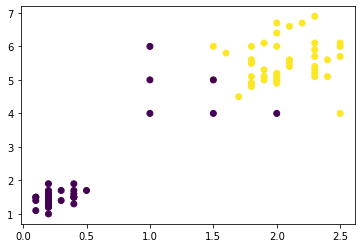

In [76]:
plt.scatter(data_train['petal width (cm)'], data_train['petal length (cm)'], c = target_train)
someList = [[1,4],[1,5], [1,6], [1.5,4], [1.5,5], [1.5,6], [2,4], [2,5], [2,6], [2.5,4]]
plt.scatter([i[0] for i in someList], [i[1] for i in someList], c= lor.predict(someList) )

plt.show()